# OK Cupid Data Analysis

In the following notebook an analysis will be made of ~60 thousand profiles of the dating site [OKCupid](www.okcupid.com).  The data consists of 31 columns as follows:

The names are self explanatory

In [99]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [100]:
okcupid = pd.read_csv('profiles.csv')
okcupid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

The following is a sample of the data:

In [101]:
okcupid.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single


## Objective

In the following section, a supervised Machine Learning algorith will be used to predict the status given some other variables.

single            0.929120
seeing someone    0.034431
available         0.031111
married           0.005171
unknown           0.000167
Name: status, dtype: float64


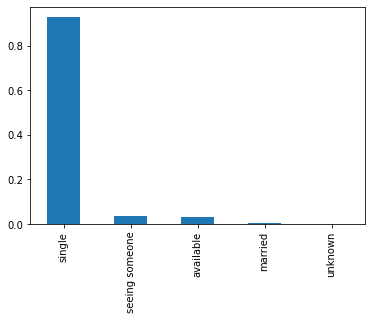

In [102]:
print(okcupid.status.value_counts(normalize = True))
okcupid.status.value_counts(normalize = True).plot(kind = 'bar')
plt.show()

Since the data is from a dating site, it makes sense that 92% of users are single. This is important to know when splitting the dataset into train and test subsets.

The variables selected to predict the status are the following:

* age
* body_type
* drinks
* height
* income
* sex

The predicted variables is the following:

* status


In [103]:
data = okcupid[['age','body_type','drinks','height','income','sex', 'status']].copy()

It is necessary, then, to prepare each variable for this purpose

### Preparing the Data

#### Age

In [104]:
data.age.unique()

array([ 22,  35,  38,  23,  29,  32,  31,  24,  37,  28,  30,  39,  33,
        26,  27,  20,  25,  40,  36,  21,  34,  43,  46,  41,  42,  45,
        18,  55,  50,  59,  44,  48,  54,  51,  62,  52,  19,  58,  66,
        53,  63,  47,  49,  61,  60,  57,  56,  65,  64,  68, 110,  69,
        67, 109], dtype=int64)

There are some obvious outliers that must be dropped (ages of 109 and 110) .

In [105]:
data.drop(data[data.age > 100].index, inplace = True)

#### Body Type

In [106]:
data.body_type.unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

Let's fill the NaN values with _rather not say_ and create dummy variables for each category.

In [107]:
data.body_type.fillna('rather not say', inplace = True)

dummies = pd.get_dummies(data['body_type'], prefix = 'bt') #create dummies
data.drop('body_type', axis = 1, inplace = True) #drop the body_type column as it is already encoded

data = data.join(dummies)
data.head()

,age,drinks,height,income,sex,status,bt_a little extra,bt_athletic,bt_average,bt_curvy,bt_fit,bt_full figured,bt_jacked,bt_overweight,bt_rather not say,bt_skinny,bt_thin,bt_used up
0,22,socially,75.0,-1,m,single,1,0,0,0,0,0,0,0,0,0,0,0
1,35,often,70.0,80000,m,single,0,0,1,0,0,0,0,0,0,0,0,0
2,38,socially,68.0,-1,m,available,0,0,0,0,0,0,0,0,0,0,1,0
3,23,socially,71.0,20000,m,single,0,0,0,0,0,0,0,0,0,0,1,0
4,29,socially,66.0,-1,m,single,0,1,0,0,0,0,0,0,0,0,0,0


#### Drinks?

In [108]:
data.drinks.unique()

array(['socially', 'often', 'not at all', 'rarely', nan, 'very often',
       'desperately'], dtype=object)

In the same manner as before, fill the NaN with _rather not say_ and create dummy vars for each category.

In [109]:
data.drinks.fillna('rather not say', inplace = True)

dummies = pd.get_dummies(data['drinks'], prefix = 'drinks') #create dummies
data.drop('drinks', axis = 1, inplace = True) #drop the body_type column as it is already encoded

data = data.join(dummies)

#### Height

[75. 70. 68. 71. 66. 67. 65. 72. 62. 64. 69. 73. 74. 60. 63. 76. 61. 78.
 79. 59. 80. 91. 83. 77. 58. 56. 95. 57. 87. 81. 36. 43. 52. 55. 53. 93.
  8. 54. 82.  3. 86. 42. 84. 94. 50.  6. 47. 49. 48. 90. 88. nan 37.  9.
 51.  1. 92. 26. 85. 89.  4.]


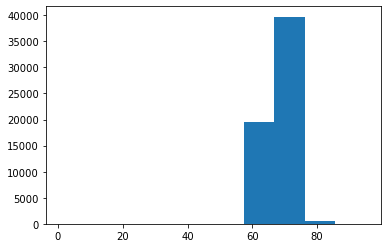

In [110]:
print(data.height.unique())
plt.hist(data.height)
plt.show()

Drop all the heights lesser than 50 and the NaN

In [111]:
data.drop(data[(data.height < 50) | (data.height.isna() == True)].index, inplace = True)

#### Sex

In [112]:
data.sex.unique()

array(['m', 'f'], dtype=object)

Map the 'm' to 0 and the 'f' to 1.

In [113]:
data['sex'] = data.sex.map({'m':0, 'f':1})

#### Income

In [114]:
data.income.value_counts(normalize = True)

-1          0.808108
 20000      0.049237
 100000     0.027055
 80000      0.018527
 30000      0.017492
 40000      0.016774
 50000      0.016273
 60000      0.012284
 70000      0.011800
 150000     0.010515
 1000000    0.008646
 250000     0.002487
 500000     0.000801
Name: income, dtype: float64

Everything is correct here, since the -1 represent 80% of the data it cannot be dropped.

The prepared dataframe looks like this:

In [115]:
data.head()

,age,height,income,sex,status,bt_a little extra,bt_athletic,bt_average,bt_curvy,bt_fit,...,bt_skinny,bt_thin,bt_used up,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_rather not say,drinks_socially,drinks_very often
0,22,75.0,-1,0,single,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,35,70.0,80000,0,single,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,38,68.0,-1,0,available,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,23,71.0,20000,0,single,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,29,66.0,-1,0,single,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Preparing the labels

In [116]:
data.status.value_counts()

single            55666
seeing someone     2064
available          1864
married             310
unknown              10
Name: status, dtype: int64

The unknown values must be dropped as they are too far in between for the classifier.

In [117]:
data.drop(data[data.status == 'unknown'].index,inplace = True)
data.status.value_counts()

single            55666
seeing someone     2064
available          1864
married             310
Name: status, dtype: int64

Now its time to split the full dataframe and the labels:

In [118]:
labels = data[['status']]

data.drop('status', axis = 1, inplace = True)

labels.head()

,status
0,single
1,single
2,available
3,single
4,single


As mentioned previously, since the status categories are mostly _single_ the split must be made using the `stratify` option:

In [119]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, stratify = labels)


In [120]:
print(f'Train set (size = {len(y_train)}):')
print(y_train.status.value_counts(normalize = True))
print(f'\nTest set (size = {len(y_test)}):')
print(y_test.status.value_counts(normalize = True))

Train set (size = 44928):
single            0.929242
seeing someone    0.034455
available         0.031116
married           0.005186
Name: status, dtype: float64

Test set (size = 14976):
single            0.929287
seeing someone    0.034455
available         0.031116
married           0.005142
Name: status, dtype: float64


We can see that in both sets there are approximate the same __proportions__ of each category. This avoids bias in the classifier.

### Model Training

The model used here is a __Random Forest Classifier__ which is composed of many decision trees formed from different splits of the training data. The prediction is, then, the most popular among all the trees.

In [121]:
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
print(f'Random Forest Score: {random_forest.score(x_test,y_test)}')

Random Forest Score: 0.9176682692307693


#### Parameter Tuning

The most important parameter to tune here is `n_estimators`, so it is necessary to find the number of estimators of bst fit:

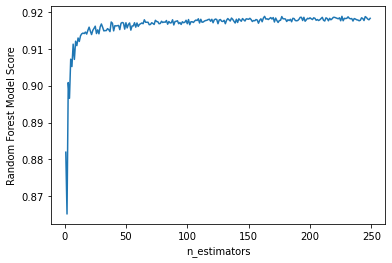

In [126]:
scores = []

for i in range(1,250):
    random_forest = RandomForestClassifier(n_estimators = i)
    random_forest.fit(x_train, y_train)
    scores.append(random_forest.score(x_test,y_test))  
    
plt.plot(range(1,250),scores)
plt.xlabel('n_estimators')
plt.ylabel('Random Forest Model Score')
plt.show()

From the previous plot one can see that the default number of estimators (100) performs OK at predicting the status of the person.

There is a problem with this approach though, a score of 0.92 while very high, is still less than guessing 'single' for every person (0.93), so this model is not valid to predict the status column.

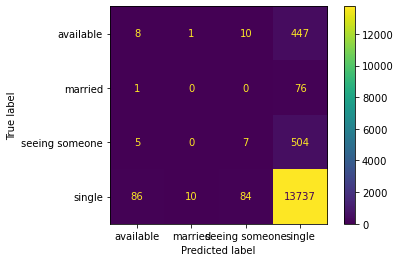

In [131]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(random_forest,x_test, y_test)
plt.show()

The previous conclusions is confirmed on the confusion matrix, as the model guessed with a high accuracy all the _single_ statuses and missed on most of the others.